In [1]:
%run 1_Data_Cleaning.ipynb

### Getting the dataset for Machine Learning portion

In [2]:
clean_data_predict = clean_df.copy()
clean_data_predict = clean_data_predict.drop(columns=['order_id', 'customer_id', 'customer_unique_id','payment_type', 'PurchasedYear'])
title = ['product_id','product_category_name_english', 'product_description_length', 'product_photos_qty', 
         'actual_hours','delivery_days','estimated', 'time_diff','price', 'freight_value', 'payment_value',
         'payment_installments','review_score']
clean_data_predict = clean_data_predict.reindex(columns = title)

In [3]:
clean_data_predict = clean_data_predict[clean_data_predict["product_category_name_english"].isnull() == False]
clean_data_predict = clean_data_predict[clean_data_predict["product_description_length"].isnull() == False]
clean_data_predict = clean_data_predict[clean_data_predict["product_photos_qty"].isnull() == False]
clean_data_predict = clean_data_predict[clean_data_predict["actual_hours"].isnull() == False]
clean_data_predict = clean_data_predict[clean_data_predict["delivery_days"].isnull() == False]
clean_data_predict = clean_data_predict[clean_data_predict["time_diff"].isnull() == False]
clean_data_predict = clean_data_predict[clean_data_predict["payment_value"].isnull() == False]
clean_data_predict = clean_data_predict[clean_data_predict["payment_installments"].isnull() == False]

In [4]:
clean_data_predict

,product_id,product_category_name_english,product_description_length,product_photos_qty,actual_hours,delivery_days,estimated,time_diff,price,freight_value,payment_value,payment_installments,review_score
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,598.0,4.0,182.0,7.0,375.0,193.0,58.90,13.29,72.19,2.0,5
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.0,2.0,389.0,16.0,445.0,56.0,239.90,19.93,259.83,3.0,4
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,695.0,2.0,190.0,7.0,513.0,323.0,199.00,17.87,216.87,5.0,5
3,7634da152a4610f1595efa32f14722fc,perfumery,480.0,1.0,147.0,6.0,278.0,131.0,12.99,12.79,25.78,2.0,4
4,ac6c3623068f30de03045865e4e10089,garden_tools,409.0,1.0,602.0,25.0,970.0,368.0,199.90,18.14,218.04,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113317,4aa6014eceb682077f9dc4bffebc05b0,housewares,1002.0,3.0,416.0,17.0,586.0,170.0,299.99,43.41,343.40,1.0,5
113318,32e07fd915822b0765e448c4dd74c828,computers_accessories,232.0,1.0,226.0,9.0,421.0,195.0,350.00,36.53,386.53,1.0,5
113319,72a30483855e2eafc67aee5dc2560482,sports_leisure,869.0,1.0,115.0,4.0,414.0,299.0,99.90,16.95,116.85,3.0,5
113320,9c422a519119dcad7575db5af1ba540e,computers_accessories,1306.0,1.0,46.0,1.0,240.0,194.0,55.99,8.72,64.71,3.0,5


### Predicting Review Score

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import train_test_split function
from sklearn.model_selection import train_test_split

y = pd.DataFrame(clean_data_predict['review_score'].astype(int))  # Labels
X = pd.DataFrame(clean_data_predict[['product_description_length','actual_hours',
                                            'estimated', 'time_diff', 'product_photos_qty',
                                            'payment_installments']])  # Features

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [6]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=300)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.652665934602245


In [8]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

time_diff                     0.226903
product_description_length    0.225279
actual_hours                  0.217450
estimated                     0.201682
payment_installments          0.069206
product_photos_qty            0.059481
dtype: float64

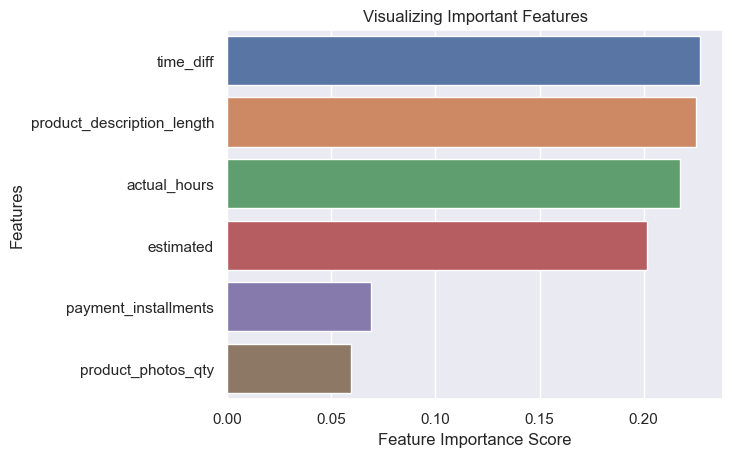

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# Creating a bar plot
sb.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()